In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,matplotlib,scipy,pandas,sklearn,mlxtend

/home/jbourbeau/.virtualenvs/icecube/lib/python2.7/site-packages/subprocess32.py:472: RuntimeWarning: The _posixsubprocess module is not being used. Child process reliability may suffer if your program uses threads.
  "program uses threads.", RuntimeWarning)


last updated: 2017-05-23 

CPython 2.7.13
IPython 5.3.0

numpy 1.12.1
matplotlib 2.0.1
scipy 0.19.0
pandas 0.19.2
sklearn 0.18.1
mlxtend 0.6.0


In [2]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import glob

from root_numpy import root2array, tree2array, list_trees
from root_pandas import read_root

import comptools as comp

Welcome to JupyROOT 6.09/02


/home/jbourbeau/.virtualenvs/icecube/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
files = sorted(glob.glob('rootfiles/ldf*.root'))

In [4]:
df = read_root(files, 'ldftree')

In [5]:
grouped_r = df.groupby('r')

In [6]:
dist = []
mean_energy = []
std_energy = []
for r, group in grouped_r:
    dist.append(r)
    mean_energy.append(group['e_em'].mean())
    std_energy.append(group['e_em'].std())
    
dist = np.asarray(dist)
mean_energy = np.asarray(mean_energy)
std_energy = np.asarray(std_energy)

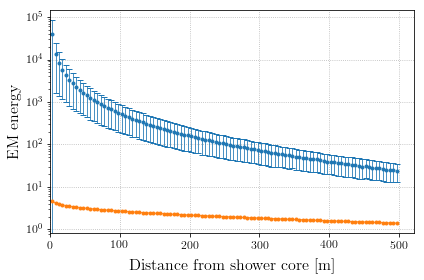

1.71357444537
2.54926381819


In [9]:
fig, ax = plt.subplots()
ax.errorbar(dist, mean_energy, yerr=std_energy, marker='.', ls='None')
log_s125, beta = comp.analysis.fit_DLP_params(mean_energy, dist, 0, 0)
print(beta)
print(log_s125)
ax.plot(dist, comp.analysis.DLP(dist, log_s125, beta))
ax.set_xlim(0)
ax.set_yscale("log", nonposy='clip')
ax.set_ylabel('EM energy')
ax.set_xlabel('Distance from shower core [m]')
ax.grid()
plt.show()

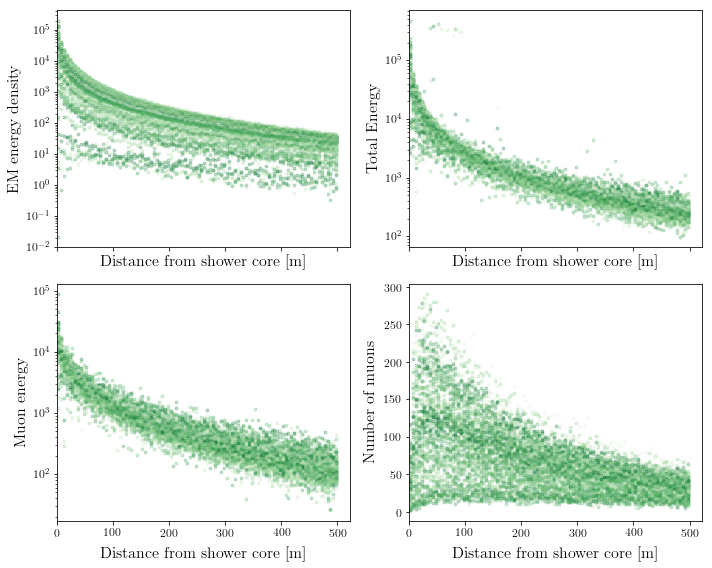

In [11]:
with sns.color_palette("Greens"):
    fig, axarr = plt.subplots(2, 2, sharex=True, figsize=(10, 8))
    betas = []
    for f in files:
        df = read_root(f, 'ldftree')
        df_sample = df.sample(10)
        log_s125, beta = comp.analysis.fit_DLP_params(df_sample['e_em'], df_sample['r'], 0, 0)
        betas.append(beta)
        for branch, label, ax in zip(['e_em', 'e_tot', 'e_mu', 'n_mu'],
                                     ['EM energy density', 'Total Energy', 'Muon energy', 'Number of muons'],
                                     axarr.flatten()):
            ax.plot(df['r'], df[branch], ls='None', alpha=0.25)
            ax.set_xlim(0)
            if branch != 'n_mu': ax.set_yscale("log", nonposy='clip')
            ax.set_ylabel(label)
            ax.set_xlabel('Distance from shower core [m]')
            ax.grid()
    plt.tight_layout()
    plt.show()

In [131]:
betas = np.asarray(betas)

In [132]:
betas

array([ 1.3845126 ,  1.44206481,  1.34218509,  1.47505975,  1.53787652,
        0.78862265,  1.41370148,  1.34946018,  1.44063957,  1.73198511,
        1.47855449,  1.69465084,  1.61656095,  1.84076579,  1.71901055,
        1.87293115,  1.7740163 ,  1.66586737,  1.64274329,  1.35754369,
        1.62424343,  1.46720169,  1.61890468,  1.64245254,  1.67076958,
        1.86825879,  1.69617277,  1.56978629,  1.62501816,  1.43006304,
        1.70783721,  1.41887377,  1.82133543,  1.76696526,  1.82337281,
        1.66236358,  1.83316145,  1.46603594,  1.74384076,  1.83828513,
        1.62705022,  1.85318787,  1.52541479,  1.65240215,  1.90365065,
        1.66165636,  1.71625275,  1.58754951,  1.59942812,  1.84376103,
        1.81930685,  1.72226337,  1.81572554,  1.70856637,  1.68219513,
        1.81261238,  1.69122566,  1.75548277,  1.68891499,  1.10673717,
        1.45534827,  1.81513567,  1.88734161,  1.26473325,  1.51038357,
        1.3455515 ,  1.61244256,  1.62364962,  1.10590838,  1.51